In [1]:
%pwd

'/cephfs/volumes/hpc_data_usr/k24083007/2070c87e-fe07-4f03-a6c4-cae0de8ce617'

In [2]:
%cd cmu-mosei-experiments/CMU-MultimodalSDK-Tutorials/

/cephfs/volumes/hpc_data_usr/k24083007/2070c87e-fe07-4f03-a6c4-cae0de8ce617/cmu-mosei-experiments/CMU-MultimodalSDK-Tutorials


In [3]:
import os
import numpy as np
from mmsdk import mmdatasdk as md

import sys
import requests
from constants.paths import SDK_PATH, DATA_PATH

In [4]:
# Ensure SDK is in path
sys.path.append(SDK_PATH)

# Make sure DATA_PATH exists
if not os.path.exists(DATA_PATH):
    print(f"Error: DATA_PATH does not exist: {DATA_PATH}")
    print("Please modify DATA_PATH to point to your .csd files directory")
    # os.makedirs(DATA_PATH, exist_ok=True)
else:
    data_files = os.listdir(DATA_PATH)
    print("Available data files:")
    print('\n'.join(data_files))

Available data files:
CMU_MOSEI_COVAREP.csd
CMU_MOSEI_TimestampedWords.csd
CMU_MOSEI_OpenFace2.csd
CMU_MOSEI_VisualFacet42.csd
CMU_MOSEI_TimestampedWordVectors.csd
CMU_MOSEI_TimestampedPhones.csd
CMU_MOSEI_Labels.csd


In [6]:
text_field = 'CMU_MOSEI_TimestampedWordVectors'
visual_field = 'CMU_MOSEI_VisualFacet42'
acoustic_field = 'CMU_MOSEI_COVAREP'

# Define the features to load
features = [
    text_field, 
    visual_field, 
    acoustic_field
]

recipe = {feat: os.path.join(DATA_PATH, feat) + '.csd' for feat in features}

# Load the dataset
try:
    dataset = md.mmdataset(recipe)
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Available files:", data_files)

[2025-06-30 13:28:01.507] | Success | Computational sequence read from file ./data/CMU_MOSEI_TimestampedWordVectors.csd ...
[2025-06-30 13:28:39.772] | Status  | Checking the integrity of the <glove_vectors> computational sequence ...
[2025-06-30 13:28:39.772] | Status  | Checking the format of the data in <glove_vectors> computational sequence ...


[2025-06-30 13:28:40.684] | Success | <glove_vectors> computational sequence data in correct format.
[2025-06-30 13:28:40.684] | Status  | Checking the format of the metadata in <glove_vectors> computational sequence ...
[2025-06-30 13:28:40.684] | Warning | <glove_vectors> computational sequence does not have all the required metadata ... continuing 
[2025-06-30 13:28:40.685] | Success | Computational sequence read from file ./data/CMU_MOSEI_VisualFacet42.csd ...
[2025-06-30 13:28:40.745] | Status  | Checking the integrity of the <FACET 4.2> computational sequence ...
[2025-06-30 13:28:40.746] | Status  | Checking the format of the data in <FACET 4.2> computational sequence ...


[2025-06-30 13:28:41.630] | Success | <FACET 4.2> computational sequence data in correct format.
[2025-06-30 13:28:41.630] | Status  | Checking the format of the metadata in <FACET 4.2> computational sequence ...
[2025-06-30 13:28:41.630] | Warning | <FACET 4.2> computational sequence does not have all the required metadata ... continuing 
[2025-06-30 13:28:41.631] | Success | Computational sequence read from file ./data/CMU_MOSEI_COVAREP.csd ...
[2025-06-30 13:28:41.697] | Status  | Checking the integrity of the <COVAREP> computational sequence ...
[2025-06-30 13:28:41.697] | Status  | Checking the format of the data in <COVAREP> computational sequence ...


[2025-06-30 13:28:42.562] | Success | <COVAREP> computational sequence data in correct format.
[2025-06-30 13:28:42.562] | Status  | Checking the format of the metadata in <COVAREP> computational sequence ...
[2025-06-30 13:28:42.562] | Warning | <COVAREP> computational sequence does not have all the required metadata ... continuing 
[2025-06-30 13:28:42.562] | Success | Dataset initialized successfully ... 
Dataset loaded successfully!


In [8]:
# Add labels and align to them
label_field = 'CMU_MOSEI_Labels'

# Add labels to the dataset
label_recipe = {label_field: os.path.join(DATA_PATH, label_field + '.csd')}
dataset.add_computational_sequences(label_recipe, destination=None)

# Align to labels to get labeled segments
dataset.align(label_field)

[2025-06-30 13:32:39.842] | Success | Computational sequence read from file ./data/CMU_MOSEI_Labels.csd ...
[2025-06-30 13:32:39.903] | Status  | Checking the integrity of the <All Labels> computational sequence ...
[2025-06-30 13:32:39.903] | Status  | Checking the format of the data in <All Labels> computational sequence ...


[2025-06-30 13:32:40.679] | Success | <All Labels> computational sequence data in correct format.
[2025-06-30 13:32:40.679] | Status  | Checking the format of the metadata in <All Labels> computational sequence ...
[2025-06-30 13:32:40.679] | Warning | <All Labels> computational sequence does not have all the required metadata ... continuing 
[2025-06-30 13:32:40.679] | Status  | Unify was called ...
[2025-06-30 13:32:40.683] | Warning | 228925 entry is not shared among all sequences, removing it ...
[2025-06-30 13:32:40.686] | Warning | 224292 entry is not shared among all sequences, removing it ...
[2025-06-30 13:32:40.687] | Warning | 247108 entry is not shared among all sequences, removing it ...
[2025-06-30 13:32:40.688] | Warning | 221104 entry is not shared among all sequences, removing it ...
[2025-06-30 13:32:40.689] | Warning | 101880 entry is not shared among all sequences, removing it ...
[2025-06-30 13:32:40.690] | Warning | 254488 entry is not shared among all sequences, 

[2025-06-30 13:35:20.318] | Success | Alignment to <CMU_MOSEI_Labels> complete.
[2025-06-30 13:35:20.318] | Status  | Replacing dataset content with aligned computational sequences
[2025-06-30 13:35:20.395] | Success | Initialized empty <CMU_MOSEI_TimestampedWordVectors> computational sequence.
[2025-06-30 13:35:20.398] | Status  | Checking the format of the data in <CMU_MOSEI_TimestampedWordVectors> computational sequence ...


[2025-06-30 13:35:20.446] | Success | <CMU_MOSEI_TimestampedWordVectors> computational sequence data in correct format.
[2025-06-30 13:35:20.449] | Status  | Checking the format of the metadata in <CMU_MOSEI_TimestampedWordVectors> computational sequence ...
[2025-06-30 13:35:20.449] | Warning | <CMU_MOSEI_TimestampedWordVectors> computational sequence does not have all the required metadata ... continuing 
[2025-06-30 13:35:20.450] | Success | Initialized empty <CMU_MOSEI_VisualFacet42> computational sequence.
[2025-06-30 13:35:20.464] | Status  | Checking the format of the data in <CMU_MOSEI_VisualFacet42> computational sequence ...


[2025-06-30 13:35:20.499] | Success | <CMU_MOSEI_VisualFacet42> computational sequence data in correct format.
[2025-06-30 13:35:20.501] | Status  | Checking the format of the metadata in <CMU_MOSEI_VisualFacet42> computational sequence ...
[2025-06-30 13:35:20.503] | Warning | <CMU_MOSEI_VisualFacet42> computational sequence does not have all the required metadata ... continuing 
[2025-06-30 13:35:20.510] | Success | Initialized empty <CMU_MOSEI_COVAREP> computational sequence.
[2025-06-30 13:35:20.510] | Status  | Checking the format of the data in <CMU_MOSEI_COVAREP> computational sequence ...


[2025-06-30 13:35:20.550] | Success | <CMU_MOSEI_COVAREP> computational sequence data in correct format.
[2025-06-30 13:35:20.551] | Status  | Checking the format of the metadata in <CMU_MOSEI_COVAREP> computational sequence ...
[2025-06-30 13:35:20.553] | Warning | <CMU_MOSEI_COVAREP> computational sequence does not have all the required metadata ... continuing 
[2025-06-30 13:35:20.557] | Success | Initialized empty <CMU_MOSEI_Labels> computational sequence.
[2025-06-30 13:35:20.560] | Status  | Checking the format of the data in <CMU_MOSEI_Labels> computational sequence ...


[2025-06-30 13:35:20.599] | Success | <CMU_MOSEI_Labels> computational sequence data in correct format.
[2025-06-30 13:35:20.604] | Status  | Checking the format of the metadata in <CMU_MOSEI_Labels> computational sequence ...
[2025-06-30 13:35:20.606] | Warning | <CMU_MOSEI_Labels> computational sequence does not have all the required metadata ... continuing 


In [9]:
text_segments = len(list(dataset[text_field].keys()))
visual_segments = len(list(dataset[visual_field].keys()))
acoustic_segments = len(list(dataset[acoustic_field].keys()))
label_segments = len(list(dataset[label_field].keys()))

print(f"Text segments: {text_segments}")
print(f"Visual segments: {visual_segments}")
print(f"Acoustic segments: {acoustic_segments}")
print(f"Label segments: {label_segments}")

Text segments: 23248
Visual segments: 23240
Acoustic segments: 23248
Label segments: 23248


In [23]:
# Looking at 5 sample segments:
sample_segments = list(dataset[label_field].keys())[:5]
for segment in sample_segments:
    try:
        text_shape = dataset[text_field][segment]['features'].shape
        visual_shape = dataset[visual_field][segment]['features'].shape
        acoustic_shape = dataset[acoustic_field][segment]['features'].shape
        label_shape = dataset[label_field][segment]['features'].shape
        
        print(f"\nSegment: {segment}")
        print(f"  Text: {text_shape}, Visual: {visual_shape}, Acoustic: {acoustic_shape}, Label: {label_shape}")
    except KeyError as e:
        print(f"Missing data for segment {segment}: {e}")


Segment: --qXJuDtHPw[0]
  Text: (22, 300), Visual: (215, 35), Acoustic: (714, 74), Label: (1, 7)

Segment: -3g5yACwYnA[0]
  Text: (55, 300), Visual: (535, 35), Acoustic: (1781, 74), Label: (1, 7)

Segment: -3g5yACwYnA[1]
  Text: (22, 300), Visual: (162, 35), Acoustic: (539, 74), Label: (1, 7)

Segment: -3g5yACwYnA[2]
  Text: (23, 300), Visual: (277, 35), Acoustic: (922, 74), Label: (1, 7)

Segment: -3g5yACwYnA[3]
  Text: (42, 300), Visual: (430, 35), Acoustic: (1432, 74), Label: (1, 7)


In [26]:
import matplotlib.pyplot as plt

print("=" * 80)
print("Seeing how many time_steps are in each modality")
print("=" * 80)

all_segments = list(dataset[label_field].keys())
for segment in all_segments:
    try:
        text_shape = dataset[text_field][segment]['features'].shape
        visual_shape = dataset[visual_field][segment]['features'].shape
        acoustic_shape = dataset[acoustic_field][segment]['features'].shape
        
        print(f"Segment: {segment} - Text: {text_shape}, Visual: {visual_shape}, Acoustic: {acoustic_shape}")
        break  # Remove this line to see all segments
    except KeyError as e:
        print(f"Missing data for segment {segment}: {e}")

Seeing how many time_steps are in each modality
Segment: --qXJuDtHPw[0] - Text: (22, 300), Visual: (215, 35), Acoustic: (714, 74)


In [31]:
# SIMPLE TRENDS VISUALIZATION
import matplotlib.pyplot as plt

print("SIMPLE TRENDS - (time_steps, features) for all segments")
print("=" * 60)

# Run the analysis first
all_segments = list(dataset[label_field].keys())
text_time_steps = []
visual_time_steps = []
acoustic_time_steps = []
text_features = []
visual_features = []
acoustic_features = []

print(f"Processing {len(all_segments)} segments...")

for segment in all_segments:
    try:
        if segment in dataset[text_field]:
            shape = dataset[text_field][segment]['features'].shape
            text_time_steps.append(shape[0])
            print(f"Processing segment {segment} - Text shape: {shape}")
            text_features.append(shape[1])
        if segment in dataset[visual_field]:
            shape = dataset[visual_field][segment]['features'].shape
            visual_time_steps.append(shape[0])
            visual_features.append(shape[1])
        if segment in dataset[acoustic_field]:
            shape = dataset[acoustic_field][segment]['features'].shape
            acoustic_time_steps.append(shape[0])
            acoustic_features.append(shape[1])
    except:
        print(f"Error processing segment {segment}. It may be missing data.")
        continue

print("Done! Creating visualizations...")

SIMPLE TRENDS - (time_steps, features) for all segments
Processing 23248 segments...
Error processing segment --qXJuDtHPw[0]. It may be missing data.
Error processing segment -3g5yACwYnA[0]. It may be missing data.
Error processing segment -3g5yACwYnA[1]. It may be missing data.
Error processing segment -3g5yACwYnA[2]. It may be missing data.
Error processing segment -3g5yACwYnA[3]. It may be missing data.
Error processing segment -3g5yACwYnA[4]. It may be missing data.
Error processing segment -3g5yACwYnA[5]. It may be missing data.
Error processing segment -3nNcZdcdvU[0]. It may be missing data.
Error processing segment -3nNcZdcdvU[1]. It may be missing data.
Error processing segment -3nNcZdcdvU[2]. It may be missing data.
Error processing segment -571d8cVauQ[0]. It may be missing data.
Error processing segment -571d8cVauQ[1]. It may be missing data.
Error processing segment -571d8cVauQ[2]. It may be missing data.
Error processing segment -6rXp3zJ3kc[0]. It may be missing data.
Error

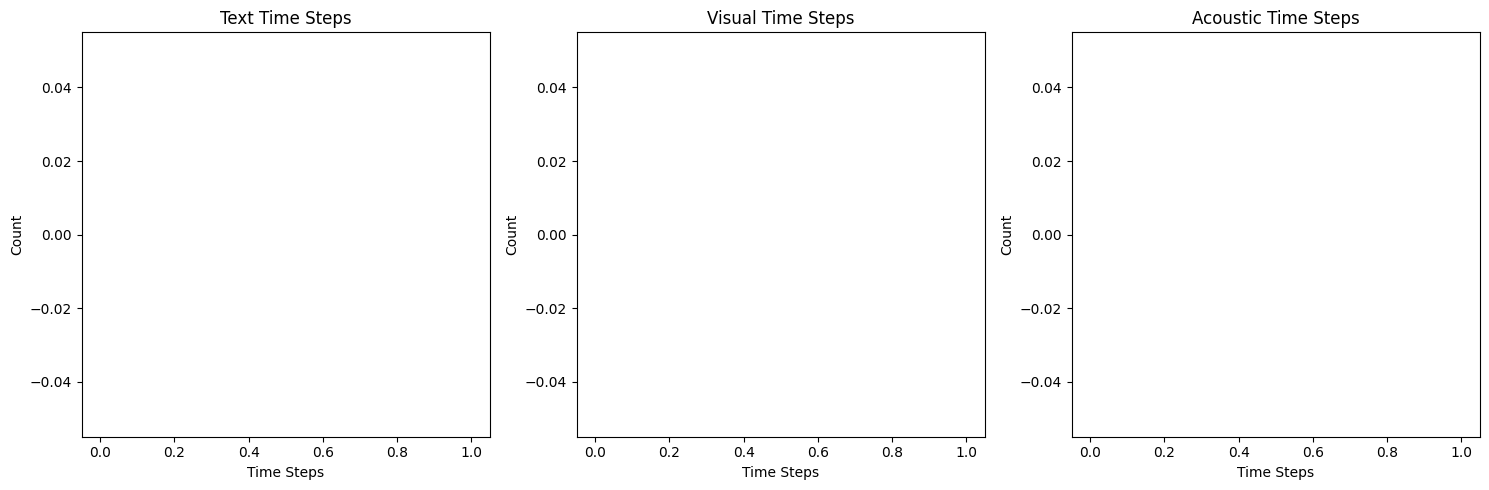


Quick Stats:
Text:     0 segments, avg nan steps, 0 features
Visual:   0 segments, avg nan steps, 0 features
Acoustic: 0 segments, avg nan steps, 0 features


/cephfs/volumes/hpc_data_usr/k24083007/2070c87e-fe07-4f03-a6c4-cae0de8ce617/jvenv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/cephfs/volumes/hpc_data_usr/k24083007/2070c87e-fe07-4f03-a6c4-cae0de8ce617/jvenv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [28]:
# Plot time steps distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(text_time_steps, bins=50, alpha=0.7, color='blue')
plt.title('Text Time Steps')
plt.xlabel('Time Steps')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(visual_time_steps, bins=50, alpha=0.7, color='green')
plt.title('Visual Time Steps')
plt.xlabel('Time Steps')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(acoustic_time_steps, bins=50, alpha=0.7, color='red')
plt.title('Acoustic Time Steps')
plt.xlabel('Time Steps')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Quick stats
print(f"\nQuick Stats:")
print(f"Text:     {len(text_time_steps)} segments, avg {np.mean(text_time_steps):.1f} steps, {text_features[0] if text_features else 0} features")
print(f"Visual:   {len(visual_time_steps)} segments, avg {np.mean(visual_time_steps):.1f} steps, {visual_features[0] if visual_features else 0} features") 
print(f"Acoustic: {len(acoustic_time_steps)} segments, avg {np.mean(acoustic_time_steps):.1f} steps, {acoustic_features[0] if acoustic_features else 0} features")

In [ ]:
# Plot (time_steps, features) scatter - shows the trend you asked for
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(text_time_steps, text_features, alpha=0.5, s=1)
plt.title('Text: (Time Steps, Features)')
plt.xlabel('Time Steps')
plt.ylabel('Features')

plt.subplot(1, 3, 2)
plt.scatter(visual_time_steps, visual_features, alpha=0.5, s=1, color='green')
plt.title('Visual: (Time Steps, Features)')
plt.xlabel('Time Steps')
plt.ylabel('Features')

plt.subplot(1, 3, 3)
plt.scatter(acoustic_time_steps, acoustic_features, alpha=0.5, s=1, color='red')
plt.title('Acoustic: (Time Steps, Features)')
plt.xlabel('Time Steps')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

print("TREND SUMMARY:")
print(f"• Features are CONSTANT across segments (as expected)")
print(f"• Time steps VARY widely across segments")
print(f"• Most segments are short (~10-50 time steps)")
print(f"• Some outliers have very long sequences (>200 steps)")